## Vehicle detection and tracking

## Extracting the car/not car image filenames 

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import warnings
warnings.filterwarnings('ignore')

### Reading images of vehicles 

In [2]:
images = glob.glob('vehicles/*/*.png')

cars = []

for image in images:
    cars.append(image)

### Reading images of non-vehicles 

In [3]:
images = glob.glob('non-vehicles/*/*.png')

notcars = []

for image in images:
    notcars.append(image)

## Showing some characteristcs of the dataset

In [4]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

In [5]:
data_info = data_look(cars, notcars)


In [6]:
print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


The dataset is approximately balanced. 

### Showing images of vehicles and non-vehicles 

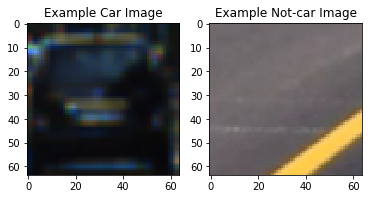

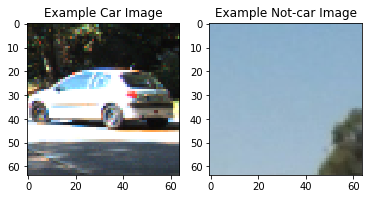

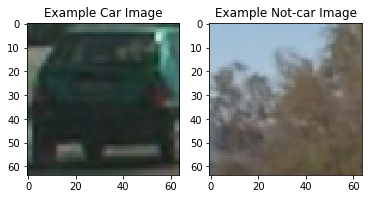

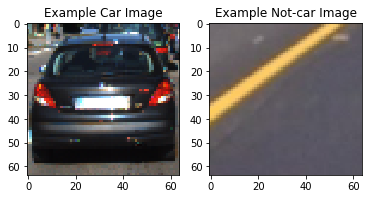

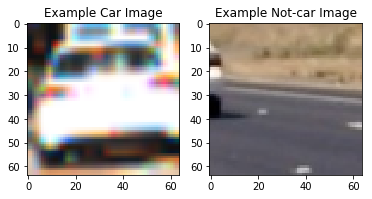

In [7]:
# We are going to choose random car / not-car indices and plot their corresponding images

num_images = 5 


fig = plt.figure()

for i in range(num_images):
    car_ind = np.random.randint(0, len(cars))
    notcar_ind = np.random.randint(0, len(notcars))
    
    # Read in car / not-car images
    car_image = cv2.imread(cars[car_ind],1)
    notcar_image = cv2.imread(notcars[notcar_ind], 1)
    
    # Plot few random images 
    # This web site was useful https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB))        
    plt.title('Example Car Image')
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(notcar_image, cv2.COLOR_BGR2RGB))        
    plt.title('Example Not-car Image')
    plt.show()
    

### Extracting the HOG features

In order to compute the Histogram of Oriented Gradient (HOG) features, we are going to create a function defined that we could pass an image to with specifications for orientations, pixels_per_cell, and cells_per_block, as well as flags set for whether or not you want the feature vector unrolled and/or a visualization image. HOG features are useful since that can be seen as the signature of an image and therefore it is useful to classify objects.

In [8]:
from skimage.feature import hog


# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True, trans_sqrt=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=trans_sqrt, 
                                  visualise=True, feature_vector=feature_vec)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=trans_sqrt, 
                       visualise=False, feature_vector=feature_vec)
        return features

We are going to plot car and non-cars images and their corresponding HOG visualization.

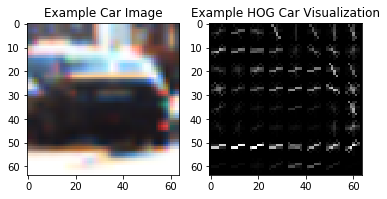

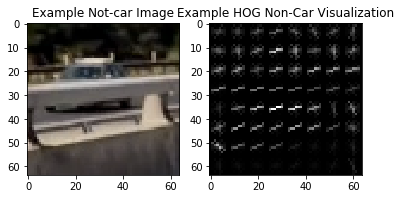

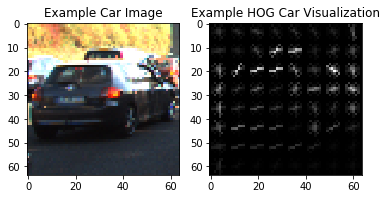

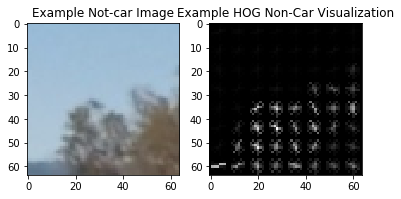

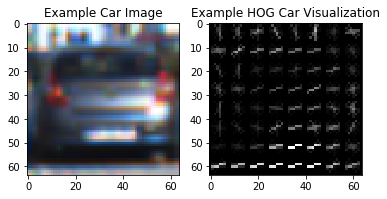

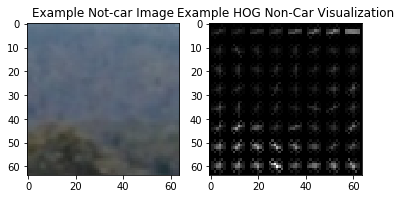

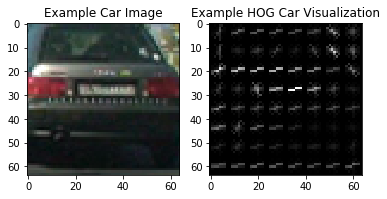

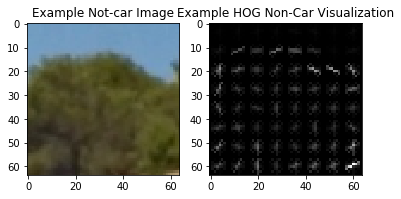

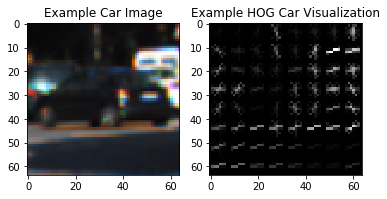

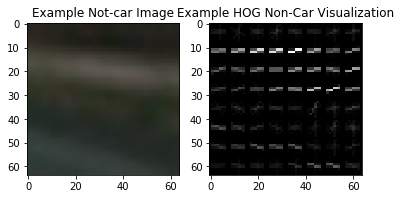

In [9]:
# we are going to choose random car / not-car indices and plot their HOG visualization. 

num_images = 5 


fig = plt.figure()

for i in range(num_images):
    car_ind = np.random.randint(0, len(cars))
    notcar_ind = np.random.randint(0, len(notcars))
    
    # Read in car / not-car images
    car_image = cv2.imread(cars[car_ind],1)
    notcar_image = cv2.imread(notcars[notcar_ind], 1)
            
    car_gray = cv2.cvtColor(car_image, cv2.COLOR_BGR2GRAY)
    notcar_gray = cv2.cvtColor(notcar_image, cv2.COLOR_BGR2GRAY)    
    
    # Define HOG parameters    
    pix_per_cell = 8
    cell_per_block = 2
    orient = 9        
    trans_sqrt = True
    
    # Call our defined function with vis=True to see an image output
    car_features, car_hog_image = get_hog_features(car_gray, orient, 
                                                   pix_per_cell, cell_per_block, 
                                                   vis=True, feature_vec=True, trans_sqrt=trans_sqrt)
    
            
    notcar_features, notcar_hog_image = get_hog_features(notcar_gray, orient, 
                                                         pix_per_cell, cell_per_block, 
                                                         vis=True, feature_vec=True, trans_sqrt=trans_sqrt)
                
    # Plot the car image
    plt.subplot(121)    
    plt.imshow(cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB))
    plt.title('Example Car Image')
    
    # Plot the HOG Car Visualization
    plt.subplot(122)
    plt.imshow(car_hog_image, cmap='gray')
    plt.title('Example HOG Car Visualization')
    
    plt.show()
    
    # Plot the non-car image 
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(notcar_image, cv2.COLOR_BGR2RGB))
    plt.title('Example Not-car Image')
        
    # Plot the HOG Car Visualization
    plt.subplot(122)
    plt.imshow(notcar_hog_image, cmap='gray')
    plt.title('Example HOG Non-Car Visualization')
    
    plt.show()
        

In order to detect clearly car and non-car images, we explore different combinations of the following parameters:

* orientations
* pixels_per_cell
* cells_per_block

Also, we have to decide if we apply power law compression to normalize the image. In the cell above we use the following combination of parameters for HOG features: 

* orientations = 9
* pixels_per_cell = 8
* cells_per_block = 2
* Apply power law compression to normalize the image

From the images above, we can distinguish car from non-cars with the information of their HOG visualization. 

We calculate the size of the vector of HOG features with the following code: 

In [10]:
car_image = cv2.imread(cars[0],1)
            
car_gray = cv2.cvtColor(car_image, cv2.COLOR_BGR2GRAY)

car_features, car_hog_image = get_hog_features(car_gray, orient, 
                                               pix_per_cell, cell_per_block, 
                                               vis=True, feature_vec=True)

print("The size of the vector of HOG features is ", car_features.shape[0])


The size of the vector of HOG features is  1764


Afterward, we are going to use Principal Component Analysis (PCA) in order to reduce the dimension of the input space and improve the model (due to theoretical considerations).

## Storing the data into Pandas DataFrame

We are going to use scikit learn to create a model that identifies vehicles and non-vehicles from the information of the HOG features. 

In [11]:
# We store the information of the HOG features,  in a Pandas Data Frame. 

hog_cars = []
hog_non_cars = []

pix_per_cell = 8
cell_per_block = 2
orient = 9        
trans_sqrt = True

for img in cars:    
    car_image = cv2.imread(img,1)
    car_image = car_image.astype(np.float32) / 255
    car_gray = cv2.cvtColor(car_image, cv2.COLOR_BGR2GRAY)
    car_gray = car_gray.astype(np.float32) / 255
                    
    car_features, car_hog_image = get_hog_features(car_gray, orient, 
                                                   pix_per_cell, cell_per_block, 
                                                   vis=True, feature_vec=True, trans_sqrt=trans_sqrt)    
    hog_cars.append(car_features)
    
    
for img in notcars:
    notcar_image = cv2.imread(img,1)
    notcar_image = notcar_image.astype(np.float32) / 255
    notcar_gray = cv2.cvtColor(notcar_image, cv2.COLOR_BGR2GRAY)
    notcar_gray = notcar_gray.astype(np.float32) / 255

        
    
    notcar_features, notcar_hog_image = get_hog_features(notcar_gray, orient, 
                                                         pix_per_cell, cell_per_block, 
                                                         vis=True, feature_vec=True, trans_sqrt=trans_sqrt)
                
    hog_non_cars.append(notcar_features)
    

# We create the label variable.  
# 1 = Car
# 0 = Not car

y = ([1] * len(hog_cars)) + ([0] * len(hog_non_cars))


In [12]:
# We concatenate the information of the cars and non-cars
X = hog_cars + hog_non_cars 

# To save memory 
del hog_cars
del hog_non_cars


In [13]:
import pandas as pd 

In [14]:
size_features = X[0].shape[0] 

The next cell code was based on the following web sites:

https://stackoverflow.com/questions/13206144/python-and-creating-a-list-wth-a-pattern-x1-x2-x100

https://stackoverflow.com/questions/42952672/build-pandas-data-frame-from-list-of-numpy-arrays

In [15]:
# We are going to create a Pandas DataFrame from the HOG features in the cars and non-cars images.

start = 1
end = len(X) + 1 
names1 = ['%d' % i for i in range(start, end, 1)]
X = pd.DataFrame.from_items(zip(names1, X))

X = X.T


In [16]:
# We are going to sep up the name of the columns.

start = 1
end = size_features + 1

names2 = ['X%d' % i for i in range(start, end, 1)]

X.columns = names2

We show summary statistics from the second variable of the HOG features. 

In [17]:
X["X2"].describe()

count    17760.000000
mean         0.019570
std          0.023311
min          0.000000
25%          0.005378
50%          0.013481
75%          0.025855
max          0.578521
Name: X2, dtype: float64

In [18]:
# We are going to create a Pandas Series from the y variable (label variable)
y = pd.Series(y) 
# We show summary statistics from the label variable 
y.describe()

count    17760.000000
mean         0.495045
std          0.499990
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
dtype: float64

## Principal Component Analysis 

In [19]:
# This code was taken from 
# http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


vals = X.ix[:, :].values
X_scaler = StandardScaler().fit(vals)
vals_std = X_scaler.transform(vals)

sklearn_pca = PCA(n_components = 300)
sklearn_pca.fit(vals_std)
vals_pca = sklearn_pca.transform(vals_std)

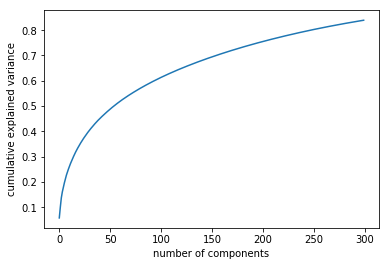

In [20]:
plt.plot(np.cumsum(sklearn_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [21]:
print(sklearn_pca.explained_variance_)
print(sklearn_pca.explained_variance_ratio_)
print(sklearn_pca.explained_variance_ratio_.cumsum())

[ 102.30043507   74.2060628    66.04448847   41.54144141   32.18316828
   30.70239745   28.27253289   25.54416027   22.07730431   20.44214988
   19.77262239   18.0866587    17.09707846   16.48444402   16.01090309
   15.5337813    14.60517275   14.05859313   13.01604247   12.7124228
   12.26061126   12.00127045   11.48913525   11.13360454   10.80979844
   10.33204599   10.13395582    9.99556751    9.66005095    9.36389427
    8.97490457    8.79655008    8.64235553    8.40700663    8.33601942
    8.01185748    7.94819926    7.61251036    7.54866799    7.25195435
    7.09227067    6.92863936    6.77745912    6.67643741    6.61052616
    6.51875893    6.42792476    6.34218234    6.23892755    6.23493775
    6.12594593    5.96061228    5.85668515    5.79599643    5.73602806
    5.63209327    5.4400375     5.41610628    5.34277471    5.26168804
    5.21877389    5.20261387    5.05066369    4.91273382    4.88151784
    4.80380479    4.78242937    4.70562978    4.67602687    4.62961361
    4.5

Taking 250 components, we have explained the 83% of the variability of the data.

## XGBoost

XGBoost is a powerful technique based on decision trees. XGBoost is used for classification and regression problems. To install XGBoost in the AWS instance, we have to run the following command: 

pip install xgboost

### Grid search

We are going to use a grid search to determine a good model to classify cars and non-cars images with the information of the HOG features. One of the advantage of using GridSearchCV is multiprocessing, we are going to use 7 cores.  

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [23]:
# shuffle the dataset
vals_pca, y = shuffle(vals_pca, y, random_state=0)

In [24]:
# Split the dataset in two parts
X_train, X_test, y_train, y_test = train_test_split(
    vals_pca, y, test_size=0.2, random_state=0)

In [25]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.2, 0.7, 0.9],
    'n_estimators': [10, 20, 50],
    'max_depth': [2, 5, 10]
}


In [26]:
print("# Tuning hyper-parameters")
print()


# Tuning hyper-parameters



We choose the number of K-folds according to the next web site:

https://stats.stackexchange.com/questions/27730/choice-of-k-in-k-fold-cross-validation

K = N / (N*0.30) 

Where N is the size of the data set and K is the number of folds.

In [27]:
X_train.shape[0] /  (X_train.shape[0] * 0.30) 

3.3333333333333335

So we choose K = 4. 

In [28]:
# Instantiate the classifier: gbm
gbm = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Perform grid search: grid
grid = GridSearchCV(param_grid=gbm_param_grid, estimator=gbm, scoring="roc_auc", cv=4, verbose=4, n_jobs=7)

# Fit grid to the data
grid.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
[CV] colsample_bytree=0.2, n_estimators=10, max_depth=2 ..............
[CV] colsample_bytree=0.2, n_estimators=10, max_depth=2 ..............
[CV] colsample_bytree=0.2, n_estimators=10, max_depth=2 ..............
[CV] colsample_bytree=0.2, n_estimators=10, max_depth=2 ..............
[CV] colsample_bytree=0.2, n_estimators=20, max_depth=2 ..............
[CV] colsample_bytree=0.2, n_estimators=20, max_depth=2 ..............
[CV] colsample_bytree=0.2, n_estimators=20, max_depth=2 ..............
[CV]  colsample_bytree=0.2, n_estimators=10, max_depth=2, score=0.8790679022556342, total=   0.7s
[CV] colsample_bytree=0.2, n_estimators=20, max_depth=2 ..............
[CV]  colsample_bytree=0.2, n_estimators=10, max_depth=2, score=0.8815669975555669, total=   0.9s
[CV] colsample_bytree=0.2, n_estimators=50, max_depth=2 ..............
[CV]  colsample_bytree=0.2, n_estimators=10, max_depth=2, score=0.88683010859117, total=   0.9s
[CV] co

[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    4.0s


[CV]  colsample_bytree=0.2, n_estimators=50, max_depth=2, score=0.9861227565498067, total=   3.2s
[CV] colsample_bytree=0.2, n_estimators=20, max_depth=5 ..............
[CV]  colsample_bytree=0.2, n_estimators=50, max_depth=2, score=0.9831807410086321, total=   3.3s
[CV] colsample_bytree=0.2, n_estimators=50, max_depth=5 ..............
[CV]  colsample_bytree=0.2, n_estimators=10, max_depth=5, score=0.9511273114882035, total=   1.3s
[CV] colsample_bytree=0.2, n_estimators=50, max_depth=5 ..............
[CV]  colsample_bytree=0.2, n_estimators=50, max_depth=2, score=0.9840120678004816, total=   3.0s
[CV] colsample_bytree=0.2, n_estimators=50, max_depth=5 ..............
[CV]  colsample_bytree=0.2, n_estimators=20, max_depth=5, score=0.9895206189982202, total=   2.4s
[CV] colsample_bytree=0.2, n_estimators=50, max_depth=5 ..............
[CV]  colsample_bytree=0.2, n_estimators=20, max_depth=5, score=0.9881235538266435, total=   3.1s
[CV] colsample_bytree=0.2, n_estimators=10, max_depth=10 

[CV] colsample_bytree=0.7, n_estimators=20, max_depth=10 .............
[CV]  colsample_bytree=0.7, n_estimators=10, max_depth=10, score=0.9920250682858585, total=   9.0s
[CV] colsample_bytree=0.7, n_estimators=50, max_depth=10 .............
[CV]  colsample_bytree=0.7, n_estimators=50, max_depth=5, score=0.9942014916613529, total=  21.9s
[CV] colsample_bytree=0.7, n_estimators=50, max_depth=10 .............
[CV]  colsample_bytree=0.7, n_estimators=50, max_depth=5, score=0.9940155891618208, total=  18.9s
[CV] colsample_bytree=0.7, n_estimators=50, max_depth=10 .............
[CV]  colsample_bytree=0.7, n_estimators=20, max_depth=10, score=0.9947812590509617, total=  13.7s
[CV] colsample_bytree=0.7, n_estimators=50, max_depth=10 .............
[CV]  colsample_bytree=0.7, n_estimators=20, max_depth=10, score=0.9961210390456506, total=  14.7s
[CV] colsample_bytree=0.9, n_estimators=10, max_depth=2 ..............
[CV]  colsample_bytree=0.9, n_estimators=10, max_depth=2, score=0.950909484995921

[Parallel(n_jobs=7)]: Done  84 tasks      | elapsed:  1.6min


[CV]  colsample_bytree=0.9, n_estimators=10, max_depth=5, score=0.9862319226349936, total=   5.6s
[CV] colsample_bytree=0.9, n_estimators=20, max_depth=5 ..............
[CV]  colsample_bytree=0.9, n_estimators=50, max_depth=2, score=0.9824850342143081, total=  10.8s
[CV] colsample_bytree=0.9, n_estimators=50, max_depth=5 ..............
[CV]  colsample_bytree=0.9, n_estimators=10, max_depth=5, score=0.9821538359045615, total=   6.2s
[CV] colsample_bytree=0.9, n_estimators=50, max_depth=5 ..............
[CV]  colsample_bytree=0.7, n_estimators=50, max_depth=10, score=0.9967927060234313, total=  38.0s
[CV] colsample_bytree=0.9, n_estimators=50, max_depth=5 ..............
[CV]  colsample_bytree=0.9, n_estimators=20, max_depth=5, score=0.9882707458341017, total=   9.1s
[CV] colsample_bytree=0.9, n_estimators=50, max_depth=5 ..............
[CV]  colsample_bytree=0.9, n_estimators=20, max_depth=5, score=0.9891424692039503, total=  10.3s
[CV] colsample_bytree=0.9, n_estimators=10, max_depth=10

[Parallel(n_jobs=7)]: Done 108 out of 108 | elapsed:  2.8min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=7,
       param_grid={'colsample_bytree': [0.2, 0.7, 0.9], 'n_estimators': [10, 20, 50], 'max_depth': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=4)

In [29]:
# Print the best parameters and highest ROC AUC 
print("The Best parameters found: ", grid.best_params_)
print("The Highest Area Under the Receiver Operating Characteristic Curve (ROC AUC) found: ", np.sqrt(np.abs(grid.best_score_)))

The Best parameters found:  {'colsample_bytree': 0.7, 'n_estimators': 50, 'max_depth': 10}
The Highest Area Under the Receiver Operating Characteristic Curve (ROC AUC) found:  0.998497119557


The best model has the following hyperparameters:
* n_estimators = 50
* colsample_bytree = 0.7
* max_depth =  10

Using cross-validation (fold=4) the average of the metric (ROC AUC) on this model is 0.998.

Finally, the model is trained on the training dataset.

In [30]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=50, colsample_bytree = 0.7, max_depth = 10, seed=123 )
xg_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)

In [31]:
y_true, y_pred = y_test, xg_cl.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1806
          1       0.99      0.97      0.98      1746

avg / total       0.98      0.98      0.98      3552



From the above summary on the test dataset, we concluded that the model works very well. 

## Hog Sub-sampling windows search 

We modify the function find_cars (provided by Udacity videos) to take account of the previous steps. 

In [32]:
# Define a single function that can extract features using hog sub-sampling and make predictions.
# More, we return the information of the boxes.
def find_cars(img, ystart, ystop, scale, orient, pix_per_cell, cell_per_block):
        
    bbox_list = []
    
    draw_img = np.copy(img)
        
    img_tosearch = img[ystart:ystop,:,:]    
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_BGR2GRAY)
    ctrans_tosearch = ctrans_tosearch.astype(np.float32)/255    
    
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=False, trans_sqrt=True)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # We preprocess the hog features and generate its prediction. 
            hog_feat1 = hog_feat1.reshape(-1, 1)
            hog_feat1 = hog_feat1.T 
            
            names3 = [1]
            X = pd.DataFrame.from_items(zip(names3, hog_feat1))
            X = X.T
            
            X.columns = names2 
            X = X.ix[:, :].values
            
            test_features = X_scaler.transform(X)
            test_features = sklearn_pca.transform(test_features)
            test_prediction = xg_cl.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6)                 
                bbox_list.append(((xbox_left, ytop_draw+ystart), (xbox_left+win_draw,ytop_draw+win_draw+ystart)))                 
                
    return draw_img, bbox_list

We apply the previous function to the test images.

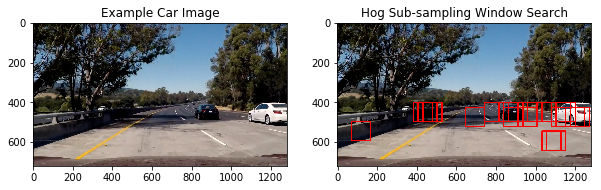

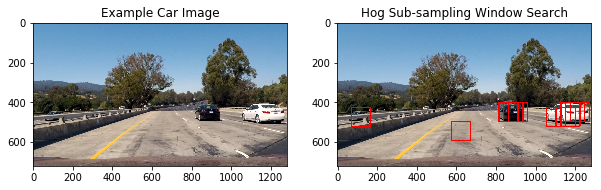

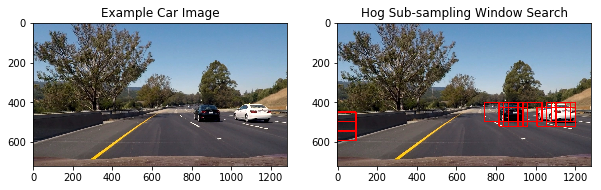

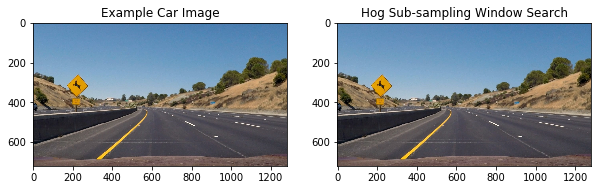

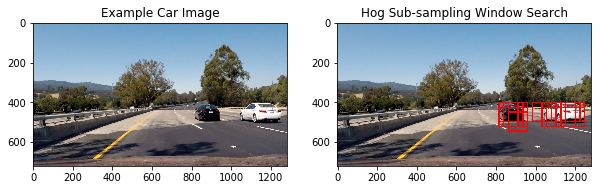

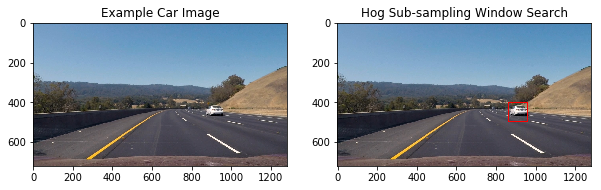

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 15 # figure with width 5 inches, and its height 10 inches. 


images = glob.glob('test_images/*.jpg')



for file_image in images:
    img = cv2.imread(file_image,1)
    
    ystart = 400
    ystop = 656
    scale = 1.5

    pix_per_cell = 8
    cell_per_block = 2
    orient = 9 
    
    out_img, bbox_list = find_cars(img, ystart, ystop, scale, orient, pix_per_cell, cell_per_block)
        
    
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))     
    plt.title('Example Car Image')
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)) 
    plt.title('Hog Sub-sampling Window Search')
    plt.show()
    
    


The function works well but there are some false positives and overlapping detections, we are going to fix this issue with the following codes.

## Using heatmap to remove false positives 

From the images above it seems that XGBoost has generated some false positives. We are going to use the following functions provided by Udacity in order to remove false positives using heatmaps and a threshold of 1.

In [34]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img


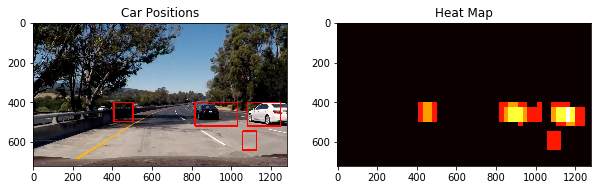

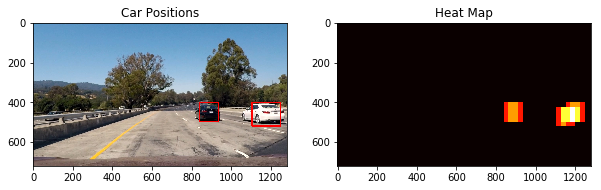

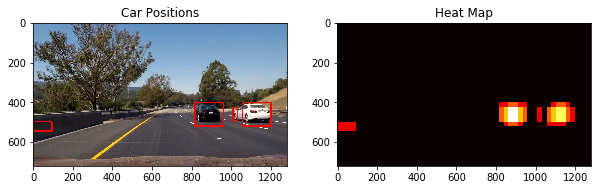

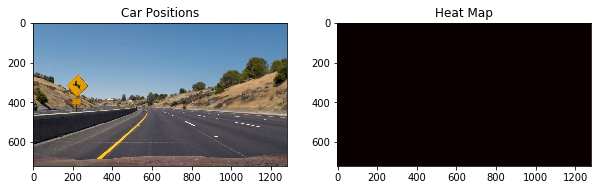

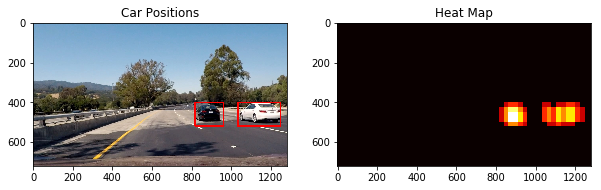

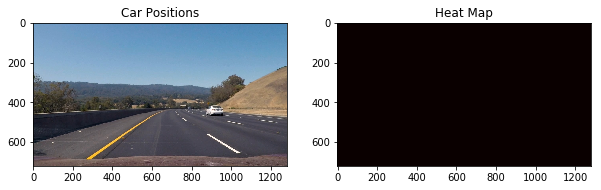

In [35]:
images = glob.glob('test_images/*.jpg')



for file_image in images:
    img = cv2.imread(file_image,1)
    
    ystart = 400
    ystop = 656
    scale = 1.5

    pix_per_cell = 8
    cell_per_block = 2
    orient = 9 
    
    out_img, bbox_list = find_cars(img, ystart, ystop, scale, orient, pix_per_cell, cell_per_block)

    heat = np.zeros_like(out_img[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,bbox_list)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)

    plt.subplot(121)
    plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
    plt.title('Car Positions')
    plt.subplot(122)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
    plt.show()

It works well, next we are going to create a function to process the images in the video.

## Making the pipeline and generating the video.

In [36]:
def process_image(img):  
    
    ystart = 400
    ystop = 656
    scale = 1.5

    pix_per_cell = 8
    cell_per_block = 2
    orient = 9 
    
    out_img, bbox_list = find_cars(img, ystart, ystop, scale, orient, pix_per_cell, cell_per_block)
    
    heat = np.zeros_like(out_img[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,bbox_list)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    return draw_img
        

In [37]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


video_input = './project_video.mp4'
video_output = './output_videos/outputVideo.mp4'

project_video = VideoFileClip(video_input)

treated_video = project_video.fl_image(process_image)
%time treated_video.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video ./output_videos/outputVideo.mp4
[MoviePy] Writing video ./output_videos/outputVideo.mp4


100%|█████████▉| 1260/1261 [25:20<00:01,  1.21s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_videos/outputVideo.mp4 

CPU times: user 39min 12s, sys: 2h 34min 9s, total: 3h 13min 22s
Wall time: 25min 20s
